## Task A

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
df_a=pd.read_csv('5_a.csv')
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [16]:
#this will create a new column y_cap with values 1 if prob of prob >= 0.5 and 0 if prob < 0.5
def threshold(dataset):
    
    if dataset['proba'] >= 0.5:
        y_cap = int(1)
    else:
        y_cap = int(0)
    return y_cap

df_a['y_cap'] = df_a.apply(threshold, axis = 1)
df_a.head()
#del df_a['proba']

,y,proba,y_cap
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [18]:
#We will apply a condition on the dataset to calculate the confusion matrix elements and calcuate precision, recall, f1 score
#accuracy score and confusion matrix

def condition(df): 
    tn = 0
    fn = 0
    fp = 0
    tp = 0
    
    if df['y'] == 0 and df['y_cap'] == 0:
        tn+=1
    elif df['y'] == 0 and df['y_cap'] == 1:
        fp+=1
    elif df['y'] == 1 and df['y_cap'] == 1:
        tp+=1
    else:
        fn+=1
        
    return (tp, fp, fn, tn)

new_a = df_a.apply(condition, axis=1)
t_p,f_n,f_p,t_n = [], [], [], []
for a,b,c,d in new_a:
    t_p.append(a)
    f_n.append(b)
    f_p.append(c)
    t_n.append(d)
    
tp,fn,fp,tn = sum(t_p), sum(f_n),sum(f_p),sum(t_n)
#print(tp,fn,fp,tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = (2*precision*recall) / (precision + recall)
confusion_matrix = [[tp, fp],[fn,tn]]
accuracy_score = (tp + tn)/len(df_a['proba'])

print('The confusion matrix is:', confusion_matrix, '\nThe precision and recall is:', precision,
      'and' ,recall, '\nThe f1 score and accuracy score is', f1_score, 'and', 'accuracy_score', accuracy_score)

The confusion matrix is: [[10000, 0], [100, 0]] 
The precision and recall is: 1.0 and 0.9900990099009901 
The f1 score and accuracy score is 0.9950248756218906 and accuracy_score 0.9900990099009901


In [19]:
#this will calculate the tpr and fpr arrays to calculate the AUC through np.trapz

def Area_under_curve(dataset):
    uniq_prob = list(set(dataset['proba'].sort_values( ascending=False)))

    probab_results = []
    for threshold in uniq_prob:
        ptr = [0.0 if prob < threshold else 1.0 for prob in dataset['proba']]
        probab_results.append(ptr)

    tpr = []
    fpr = []

    for arr in probab_results:
        tp = 0
        tn = 0
        fp = 0
        fn = 0

        for i, j in zip(dataset['y'], arr):
            if i == 1.0 and j==1.0:
                tp += 1
            elif i == 0 and j == 0:
                tn += 1
            elif i == 0 and j == 1:
                fp += 1
            else:
                fn += 1  
                
        truePR = tp / (tp + fn)
        falsePR = fp / (fp + tn)
        tpr.append(truePR)
        fpr.append(falsePR)
    tpr = np.array(sorted(tpr))
    fpr = np.array(sorted(fpr))
    
    return np.trapz(tpr, fpr), tpr, fpr


In [20]:
auc, tpr, fpr = Area_under_curve(df_a)
print('The area under the curve is:', auc)

The area under the curve is: 0.48829900000000004


Text(0.5,1,'ROC curve for task A')

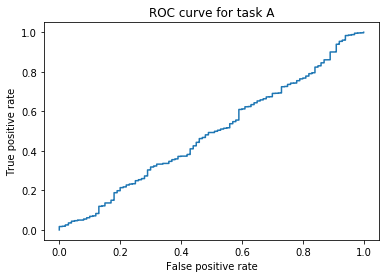

In [11]:
# we plot the roc curve, which is fpr vs tpr
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for task A")

## Task B

In [21]:
#Task b is same as task a, given the dataset only changes 
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [22]:
def threshold(dataset):
    
    if dataset['proba'] >= 0.5:
        y_cap = int(1)
    else:
        y_cap = int(0)
    return y_cap

df_b['y_cap'] = df_b.apply(threshold, axis = 1)
df_b.head()

,y,proba,y_cap
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [23]:
# will use the condition fuction from above
new_b = df_b.apply(condition, axis=1)
t_p,f_n,f_p,t_n = [], [], [], []
for a,b,c,d in new_b:
    t_p.append(a)
    f_n.append(b)
    f_p.append(c)
    t_n.append(d)
    
tp,fn,fp,tn = sum(t_p), sum(f_n),sum(f_p),sum(t_n)
#print(tp,fn,fp,tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = (2*precision*recall) / (precision + recall)
confusion_matrix = [[tp, fp],[fn,tn]]
accuracy_score = (tp + tn)/len(df_a['proba'])

print('The confusion matrix is:', confusion_matrix, '\nThe precision and recall is:', precision ,'and' ,recall, '\nThe f1 score and accuracy score is', f1_score, 'and', 'accuracy_score', accuracy_score)

The confusion matrix is: [[55, 45], [239, 9761]] 
The precision and recall is: 0.55 and 0.1870748299319728 
The f1 score and accuracy score is 0.2791878172588833 and accuracy_score 0.9718811881188119


In [24]:
def Area_under_curve(dataset):
    uniq_prob = list(set(dataset['proba'].sort_values( ascending=False)))

    probab_results = []
    for threshold in uniq_prob:
        ptr = [0.0 if prob < threshold else 1.0 for prob in dataset['proba']]
        probab_results.append(ptr)

    tpr = []
    fpr = []

    for arr in probab_results:
        tp = 0
        tn = 0
        fp = 0
        fn = 0

        for i, j in zip(dataset['y'], arr):
            if i == 1.0 and j==1.0:
                tp += 1
            elif i == 0 and j == 0:
                tn += 1
            elif i == 0 and j == 1:
                fp += 1
            else:
                fn += 1  
                
        truePR = tp / (tp + fn)
        falsePR = fp / (fp + tn)
        tpr.append(truePR)
        fpr.append(falsePR)
    tpr = np.array(sorted(tpr))
    fpr = np.array(sorted(fpr))
    
    return np.trapz(tpr, fpr), tpr, fpr


In [26]:
auc, tpr, fpr = Area_under_curve(df_b)
print('The area under the curve is:', auc)

The area under the curve is: 0.9377570000000001


Text(0.5,1,'ROC curve for task b')

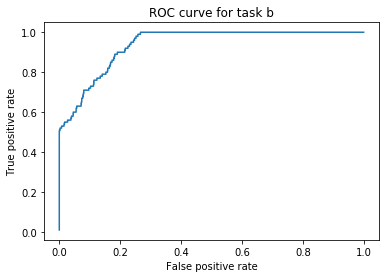

In [27]:
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for task b")

## Task C

In [29]:
df_c = pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [30]:
#unique prob values for using as thresholds
uniq_prob = list(set(df_c['prob'].sort_values( ascending=False)))

In [31]:
#In this we will use the unique prob values as thresolds and calulate the minimum value of 'X' that gives us the threshold
#and the threshold value

def best_threshold(dataset):
    
    
    prob_results = []
    for threshold in uniq_prob:
        ptr = [0.0 if prob < threshold else 1.0 for prob in dataset['prob']]
        prob_results.append(ptr)

    X = []

    for arr in prob_results:
        fp = 0
        fn = 0

        for i, j in zip(dataset['y'], arr):
            if i == 1.0 and j == 0.0:
                fn += 1
            elif i == 0.0 and j == 1.0:
                fp += 1
        x = (500 * fn) + (100 * fp)
        X.append(x)

    min_x = min(X)
    index = X.index(min_x)
    uniq_prob[index]
    print("the minimum value of 'X' is: ", min_x, "\nand the threshold value corresponing to it is: ", uniq_prob[index])

    return uniq_prob[index]



In [32]:
best_threshold(df_c)

the minimum value of 'X' is:  141000 
and the threshold value corresponing to it is:  0.2300390278970873


0.2300390278970873

## Task D

In [5]:
df_d = pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [33]:
#In this we calculate different parameters for regression like mean square error (mse), mean absolute percentage error (mape)
# and r square error

def regression(dataset):
    
    y_mean = sum(np.array(dataset['y']))/len(dataset)
    mse = 0
    for i in range(len(dataset)):
        mse_0 = (dataset['y'][i] - dataset['pred'][i])**2
        mse += mse_0
    mse = mse/len(dataset)
    mse

    mape = 0
    for i in range(len(dataset)):
        mape_0 = np.abs(dataset['y'][i] - dataset['pred'][i])
        mape += mape_0
    mape = mape/(len(dataset) * y_mean)
    mape

    # coefficient of determination
    cod = len(dataset) * mse

    rsq = []
    for i in dataset['y']:
        rsq.append((i-y_mean)**2)
    rsq = (sum(rsq))
    r_sqre = 1 - (cod/rsq)

    print("Mean Squared error is: ", mse, "\nMean Absolute Percentage Error is: ", mape, "\nand the R-Squared value is: ", r_sqre)

In [34]:
regression(df_d)

Mean Squared error is:  177.16569974554707 
Mean Absolute Percentage Error is:  0.1291202994009687 
and the R-Squared value is:  0.9563582786990964
